# Creating the Whole Machine Learning Pipeline with PyCaret

PyCaretで機械学習パイプライン全体を作成する

<https://www.datasource.ai/uploads/624e8836466a40923b64b901b5050c0f.html>

このチュートリアルでは、`データの取り込み`、`前処理`、`モデルの学習`、`ハイパーパラメータの適合`、`予測`、あとで使用するための`モデルの保存`に至るまで、MLの全プロセスをカバーしています。

自然に構成され、非常に直感的に覚えられるコマンドを10個以内にまとめ、これらすべてのステップを完了させるのです。

- `create_model()`
- `tune_model()`
- `compare_models()`
- `plot_model()`
- `evaluate_model()`
- `predict_model()`


全体像を見てみましょう

(1)データを取得する-->(2)PyCaretの環境構築-->(3)モデルの比較-->(4)モデルを作成する-->(5)モデルのチューニング

(6)モデルをプロットする-->(7)モデルを評価する-->(8)モデルの最終決定-->(9)モデルを使って予測する-->(10)生産用にモデルを保存/ロードする

![working the Machine Learning Pipeline with PyCaret](./00_ml-pipeline.png)

PyCaretなしで実験全体を再現するには、ほとんどのライブラリで100行以上のコードが必要です。また、このライブラリでは、高度な前処理、アンサンブル、一般化スタッキングなど、MLパイプラインを完全にカスタマイズすることができ、データサイエンティストにとって必須の技術となっています。

PyCaretは、Pythonを使ったMLのためのオープンソースの低レベルライブラリで、データの準備からモデルのデプロイまでを数分で行うことができます。科学者やデータアナリストは、最初から最後まで効率的に反復的なデータサイエンス実験を行うことができ、プログラミングに費やす時間が大幅に削減されるため、より早く結論に達することが可能になります。このライブラリは、Caret de Rに非常に似ていますが、pythonで実装されています。

データサイエンス・プロジェクトに取り組む際、通常、データの理解（EDAやフィーチャー・エンジニアリング）に長い時間を要します。では、モデリング部分にかける時間を半分に減らすことができたらどうでしょう？

それでは見てみましょう。

まず、以下の前提条件が必要です。

- Python 3.6 またはそれ以降
- PyCaret 2.0 またはそれ以降

ここには、ライブラリのドキュメントなどがあります。

まず、以下のコマンドを実行してください。`!pip3 install pycaret`

Google Colabをお使いの方へ。このノートブックをGoogle Colabで実行している場合、インタラクティブな画像を表示するには、ノートブックの先頭で次のコードを実行してください。

```python
from pycaret.utils import enable_colab
enable_colab()
```

## Pycaretのモジュール

Pycaretは実行したいタスクに応じて分割されており、それぞれの学習タイプ（教師あり、教師なし）を表す異なるモジュールが用意されています。このチュートリアルでは、2値分類アルゴリズムを用いた教師あり学習モジュールに取り組みます。

### Classification モジュール

PyCaret classification モジュール (`pycaret.classification`) は、様々な技術やアルゴリズムに基づいて要素をバイナリグループに分類するために使用される教師あり機械学習モジュールです。分類問題の一般的な用途としては、クライアントのデフォルト（イエスかノーか）、クライアントの放棄（クライアントが去るのか残るのか）、病気の遭遇（陽性か陰性か）などを予測することなどがあります。

PyCaret 分類モジュールは、2 クラスまたは複数クラスの分類問題に使用することができます。18 以上のアルゴリズムと、モデル性能を分析するための 14 のプロットを備えています。ハイパーパラメータチューニング、アンサンブル、スタッキングのような高度なテクニックなど、PyCaret の分類モジュールにはすべてが揃っています。

Classification Modules

![classification modules](./classification_modules.png )

このチュートリアルでは、Default of Credit Card Clients Datasetと呼ばれるUCIデータセットを使用します。

このデータセットは、2005年4月から2005年9月までの台湾のクレジットカード顧客のデフォルト支払い、人口統計、信用データ、支払い履歴、請求書に関する情報を含んでいます。24,000のサンプルと25の特徴量があります。

データセットは[ここにあります](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)。または、ここに[ダウンロードへの直接のリンク](https://drive.google.com/file/u/2/d/1bVUAk2Y4bdqKx-2NAPk0b4mIOv078zl6/view?usp=sharing)があります。

そこで、データセットをあなたの環境にダウンロードし、次のようにロードすることにします。

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("./default_of_credit_card_clients.csv")

In [3]:
display(df)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 1- Get the data（データを取得する）

また、別の方法で読み込むこともできます。実はこの方法が、このチュートリアルで扱うデフォルトの方法となります。これはPyCaretデータセットから直接読み込む方法で、Pipelineの最初のメソッドになります。

![Get the data](./01_ml-pipeline.png)

In [4]:
from pycaret.datasets import get_data

dataset = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [5]:
# データの形状を確認する
dataset.shape

(24000, 24)

未知のデータに対する predict_model() 関数を実証するために、オリジナルのデータセットから 1200 レコードのサンプルを予測に使用するために保持しました。これは、訓練とテストの分割と混同してはいけません。なぜなら、この特定の分割は実際のシナリオをシミュレートするために行われるからです。別の言い方をすれば，この1200レコードはML実験の時点では利用できないものです。

In [6]:
# sample はオブジェクトの軸からランダムにサンプルを返します。
# これは24,000ではなく、22,800のサンプルになります。
data = dataset.sample(frac=0.95, random_state=786)

In [7]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
20534,270000,2,1,2,34,0,0,2,0,0,0,67544.0,54523.0,18865.0,44908.0,19508.0,15860.0,4025.0,5.0,34000.0,0.0,0.0,0.0,0
6885,160000,2,1,2,42,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0
1553,360000,2,1,2,30,0,0,0,0,0,0,139762.0,143515.0,147037.0,146117.0,145884.0,147645.0,6000.0,6000.0,4818.0,5000.0,5000.0,4500.0,0
1952,20000,2,1,2,25,0,0,0,0,0,0,17776.0,18886.0,19551.0,18964.0,19676.0,20116.0,1700.0,1300.0,662.0,1000.0,747.0,602.0,0
21422,70000,1,2,2,29,0,0,0,0,0,0,53700.0,53938.0,47852.0,48538.0,49034.0,49689.0,2200.0,8808.0,2200.0,2000.0,2000.0,2300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,130000,1,3,2,45,0,0,-1,0,-1,-1,13513.0,11800.0,2522.0,1261.0,390.0,390.0,1000.0,2522.0,0.0,390.0,390.0,390.0,0
8641,290000,2,1,2,29,0,0,0,0,-1,0,41435.0,30229.0,9020.0,-77.0,8123.0,210989.0,1690.0,3000.0,0.0,8200.0,205000.0,6000.0,0
6206,210000,1,2,1,41,1,2,0,0,0,0,149343.0,145319.0,86335.0,69670.0,59502.0,119494.0,0.0,5000.0,3600.0,2000.0,2000.0,5000.0,0
2110,550000,1,2,1,47,0,0,0,0,0,-2,68328.0,76797.0,55200.0,30000.0,0.0,0.0,10000.0,20000.0,5000.0,0.0,0.0,0.0,0


In [8]:
# このランダムなデータを元のデータセットから削除する
data_unseen = dataset.drop(data.index)

In [9]:
data_unseen

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5,100000,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
39,380000,1,2,2,32,-1,-1,-1,-1,-1,-1,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
57,200000,2,2,1,32,-1,-1,-1,-1,2,-1,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
72,200000,1,1,1,53,2,2,2,2,2,2,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
103,240000,1,1,2,41,1,-1,-1,0,0,-1,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23978,50000,1,2,1,37,1,2,2,2,0,0,10904.0,9316.0,4328.0,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1
23979,220000,1,2,1,41,0,0,-1,-1,-2,-2,45075.0,8840.0,1369.0,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0
23981,420000,1,1,2,34,0,0,0,0,0,0,131939.0,136721.0,140011.0,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0
23985,90000,1,2,1,36,0,0,0,0,0,0,7752.0,9112.0,10306.0,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1


In [10]:
# 両方のデータセットのインデックスをリセットする
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print(f"Data for Modeling: {data.shape}")
print(f"Unseen Data for Predictions: {data_unseen.shape}")

Data for Modeling: (22800, 24)
Unseen Data for Predictions: (1200, 24)


### Split Data（分割データ）

データセットの分割方法は重要です。なぜなら、モデリングプロセスでは使用しないデータがあり、最後に実データをシミュレートして結果を検証するために使用するデータがあるからです。モデリングに使用するデータは、トレーニングとテストの2つのシナリオを評価するために分割します。そのため、次のようなことを行っています。

![Split Data](./01_split_data.png)

#### Unseen data set (also known as validation data set) <br> 未公開データセット（検証用データセットとも呼ばれる）

- データサンプルは、最終モデルの偏りのない評価を提供するために使用されるか。
- 検証用データセットは、モデルを評価するためのゴールドスタンダードとなるものです。
- これは、モデルが完全に学習された後（学習セットとテストセットを使用）、初めて使用されます。
- 検証セットは、一般的にコンペティションのモデルを評価するために使用されるものです (例えば、多くの[Kaggle]や[DataSource.ai]のコンペティションで)。 テストセットもトレーニングセットと一緒にリリースされます。検証セットはコンペティションの終了間際に初めて公開されます。そして、勝者を決定するのは検証セットのモデルの結果です）。
- 多くの場合、テストセットを検証セットとして使用するが、これは良い方法ではありません。
- 検証セットは一般的に十分に修復されています。
- これは、モデルが実際に使用される際に直面するさまざまなクラスをカバーする、慎重にサンプリングされたデータを含んでいます。

#### Training data set（学習用データセット）

- 学習用データセット。モデルを学習させるために使用するデータサンプル。
- モデルの学習に使用するデータセット。
- モデルはこのデータを見て学習する。

#### Test data set（テストデータセット）

- テストデータセット。モデルの偏りのない評価を行うためのデータサンプルで、モデルのハイパーパラメータを調整しながら学習データセットと適合させます。
- テストデータセットのスキルがモデル構成に組み込まれるにつれて、評価はより偏っていきます。
- テスト セットは特定のモデルを評価するために使用されますが、これは頻繁に評価するためのものです。
- 私たちMLエンジニアは、このデータを使って、モデルのハイパーパラメータを微調整していきます。
- そのため、モデルはこのデータを見ることはあっても、そこから「学習」することはありません。
- テストセットの結果を利用して、より上位のハイパーパラメータを更新します。
- つまり、テストセットはモデルに影響を与えますが、それは間接的なものに過ぎません。
- テストセットは「開発セット」とも呼ばれます。これは、このデータセットがモデルの「開発」段階で役立つからです。

#### Confusion of terms（条件の混同）

- テストと検証の名称が混同される傾向があります。
- チュートリアル、ソース、本、ビデオ、先生やメンターによって用語は変わりますが、重要なのはコンセプトを維持することです。
- 我々の場合、検証セットを最初にすでに分離しています（data_unseenの1200サンプル）。

## 2- Setting up the PyCaret environment（PyCaretの環境構築）

![Setting up the PyCaret environment](./02_ml-pipeline.png)

それでは、Pycaretの環境をセットアップしてみましょう。`setup()` 関数は pycaret の環境を初期化し、モデリングとデプロイのためのデータを準備するための変換パイプラインを作成します。`setup()`はpycaretの他の関数を実行する前に呼び出す必要があります。これは2つの必須パラメータ、pandas dataframeとターゲットカラムの名前を取ります。この部分の設定のほとんどは自動的に行われますが、いくつかのパラメータは手動で設定することができます。

例えば

- デフォルトの分割比率は `70:30` であるが、`train_size` によって変更可能です。
- K-fold 交差検証はデフォルトで `10` に設定されています。
- `session_id` は定番の `random_state` です。

In [11]:
# 環境設定
from pycaret.classification import *

> 注意：以下のコマンドを実行した後、Enterキーを押して処理を終了する必要があります。その方法を説明します。セットアップの完了には、多少時間がかかる場合があります。

In [12]:
model_setup = setup(data=data, target="default", session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


`setup()` を実行すると、PyCaret の推論アルゴリズムが、特定のプロパティに基づいて全ての特徴量のデータ型を自動的に推論します。データ型は正しく推論される必要がありますが、必ずしもそうとは限りません。これを考慮し、PyCaret は `setup()` が実行された後に、機能と推論されたデータ型を含むテーブルを表示します。全てのデータ型が正しく認識された場合、Enter キーを押して実験を続行するか、Exit キーを押して実験を終了します。Enter を押すと、上記と同じ出力が得られるはずです。

PyCaret は ML の実験に不可欠ないくつかの前処理を自動的に行うため、データ型が正しいことを確認することは非常に重要です。これらのタスクはデータの種類によって異なるため、正しく設定されていることが非常に重要です。

`setup()` の `numeric_features` と `categorical_features` パラメータを使用して、PyCaret から推論されたデータの種類を上書きすることができます。セットアップが正常に実行されると、いくつかの重要な情報を含む情報グリッドが出力されます。この情報のほとんどは、 `setup()` を実行したときに構築される前処理パイプラインに関連するものです。

これらの機能のほとんどは、このチュートリアルの目的からは外れていますが、この段階で留意すべき重要な点は以下のとおりです。

- `session_id` : のちのちの再現性のために、すべての関数でシードとして配布されるpseduo-random number。
- Target type : バイナリまたはマルチクラス。ターゲットタイプは自動的に検出され、表示されます。
- Label encoded: Target 変数が1や0ではなく、文字列型（'Yes'や'No'）の場合、自動的にラベルを1と0にコーディングし、マッピング `(0 : No, 1 : Yes)` を参照として表示します。
- Original data : データセットの原形を表示します。この実験では `(22800, 24)` ==> "Seeing data" と覚えてください。
- Missing values : 元データに欠損値がある場合、これは `True` として表示されます。
- Numerical features : 数値として推論された特徴量の数。
- Categorical features : カテゴリとして推論された特徴量の数。
- Transformed train sets: なお、変換後の学習セットでは、元の形式である `(22800, 24)` は `(15959, 91)` に変換され、**カテゴリコーディングにより特徴数が `24` から `88` に増えています** 。
- Transformed test set: テストセットには `6,841` 個のサンプルが含まれます。この分割はデフォルトの値である `70/30` に基づいていますが、設定の `train_size` パラメータで変更することができます。

> 欠損値の代入（この場合、学習データには欠損値はないが、未知データに対する代入が必要）、カテゴリカルエンコーディングなど、モデリングを行う上で必要不可欠なタスクが自動的に処理されることに注目しましょう。

`setup()` パラメータのほとんどはオプションであり、前処理パイプラインをカスタマイズするために使用されます。

## 3- Compare Models（モデル比較）

![Compare Models](./03_ml-pipeline.png)

PyCaret がどのようにモデルを比較するのか、そしてパイプラインの次のステップを理解するために、N-Fold Coss-Validation の概念を理解する必要があります。

### N-Fold Coss-Validation（N 分割交差検証）

Calculating how much of your data should be divided into your test set is a delicate question. If your training set is too small, your algorithm may not have enough data to learn effectively. On the other hand, if your test set is too small, then your accuracy, precision, recall and F1 score could have a large variation.

You may be very lucky or very unlucky! In general, putting 70% of your data in the training set and 30% of your data in the test set is a good starting point. Sometimes your data set is so small that dividing it 70/30 will result in a large amount of variance.

One solution to this is to perform N-Fold cross-validation. The central idea here is that we are going to do this whole process `N` times and then average the accuracy. For example, in a 10 times cross validation, we will make the test set the first 10% of the data and calculate the accuracy, precision, recall and F1 score.

Then, we will make the cross-validation establish the second 10% of the data and we will calculate these statistics again. We can do this process 10 times, and each time the test set will be a different piece of data. Then we average all the accuracies, and we will have a better idea of how our model works on average.

テストセットにどれだけのデータを割り当てるかは、微妙な問題です。トレーニングセットが小さすぎると、アルゴリズムが効果的に学習するための十分なデータを得られない可能性があります。一方、テストセットが小さすぎると、精度、再現性、F1スコアに大きなばらつきが生じる可能性があります。

とてもラッキーかもしれないし、とてもアンラッキーかもしれません。一般的に、データの70％をトレーニングセット、30％をテストセットに入れるのは良い出発点です。データセットが小さすぎて、70/30で割ると分散が大きくなってしまうこともあります。

これに対する 1 つの解決策は、`N` 分割交差検証を実行することです。 ここでの中心的なアイデアは、このプロセス全体を「N」回実行してから、精度を平均するということです。 たとえば、10 回の交差検証では、データの最初の 10% をテストセットにして、精度、適合率、再現率、および F1 スコアを計算します。

そして、交差検証では2番目の10%のデータを確立し、再びこれらの統計量を計算します。このプロセスを10回行うことができ、毎回テストセットは異なるデータになります。そして、すべての精度を平均すると、モデルが平均的にどのように機能するかについて、より良い考えを持つことができます。

#### Note: Validation Set (yellow here) is the Test Set in our case

#### 注: 検証セット (ここでは黄色) は、この場合のテスト セットです。

![10 Fold Cross Validation](./10-fold_cross_validation.png)

Understanding the accuracy of your model is invaluable because you can start adjusting the parameters of your model to increase its performance. For example, in the K-Nearest Neighbors algorithm, you can see what happens to the accuracy as you increase or decrease `K`. Once you are satisfied with the performance of your model, it's time to enter the validation set. This is the part of your data that you split at the beginning of his experiment (`unseen_data` in our case).

It is supposed to be a substitute for the real-world data that you are really interested in sorting out. It works very similar to the test set, except that you never touched this data while building or refining your model. By finding the precision metrics, you get a good understanding of how well your algorithm will perform in the real world.

モデルの精度を理解することで、モデルのパラメータを調整し、パフォーマンスを向上させることができるため、非常に貴重です。例えば、K-Nearest Neighbors アルゴリズムでは、`K`を増減させると精度がどうなるかを見ることができます。モデルの性能に満足したら、次は検証セットに入ります。これは実験の最初に分割したデータの一部です（この例では `unseen_data` ）。

これは、あなたが本当に整理することに興味がある実世界のデータの代用品であると考えられています。これはテストセットと非常によく似ているが、モデルを構築したり改良したりする際にこのデータに触れることがないことを除けば、テストセットと同じように機能します。精度の指標を求めることで、あなたのアルゴリズムが実世界でどの程度の性能を発揮するのか、よく理解することができます。

### Comparing all models（全モデル比較）

すべてのモデルを比較して性能を評価することは、PyCaret の `setup()` が完了した時点でモデリングを開始することを推奨します（どのタイプのモデルが必要かが正確に分かっている場合は別ですが、そうでない場合も多いです）。この関数はモデルライブラリ内のすべてのモデルを学習し、メトリクスを評価するために層別交差検証を使ってスコアを付けます。

出力は、Accuracy、AUC、Recall、Precision、F1、Kappa、MCCの平均値を学習時間と共にフォルド（デフォルトでは`10`）に渡って表示するスコアグリッドを出力します。さあ、やってみましょう！

In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0260
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.2060
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,1.2320
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.2860
catboost,CatBoost Classifier,0.8219,0.7762,0.3631,0.6712,0.4711,0.3753,0.4010,2.4190
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.1200
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.5890
xgboost,Extreme Gradient Boosting,0.8160,0.7561,0.3629,0.6391,0.4626,0.3617,0.3829,2.4310
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.6760
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,1.2170


`compare_models()` 関数を使用すると、一度に多くのモデルを比較することができます。これは PyCaret を使用する大きな利点の1つです。一行で多くのモデル間の比較表が出来上がります。シンプルな2単語のコード（1行もない）で、N 分割交差検証を用いて15以上のモデルを学習・評価しました。

上記の出力された表は、比較のみを目的として、最高性能のメトリクスをハイライトしています。デフォルトの表は、"Accuracy"(最高から最低)でソートされていますが、パラメータを渡すことで変更することが可能です。例えば、`compare_models(sort='Recall')`は、Accuracyの代わりにRecallでグリッドをソートします。

もし、 `Fold` パラメータをデフォルトの `10` から別の値に変更したい場合は、 `fold` パラメータを使用します。例えば `compare_models(fold=5)` は 5 回の交差検証を行い、すべてのモデルを比較します。fold の数を減らすことで、学習時間を改善することができます。

デフォルトでは、 `compare_models` はデフォルトのソート順で最も性能の良いモデルを返しますが、 `n_select` パラメータを使用して上位 N 個のモデルのリストを返すことができます。さらに、精度、AUC、F1などのメトリクスを返します。もう一つのクールな点は、ライブラリが自動的に最良の結果をハイライトすることです。一度モデルを選択すれば、それを作成し、さらに改良することができます。他のメソッドも見てみましょう。

In [14]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


## Create the Model（モデルの作成）

![Create the Model](./04_ml-pipeline.png)

`create_model` は PyCaret で最も細かい関数であり、PyCaret のほとんどの機能の基礎となるものです。その名前が示すように、この関数は `fold` パラメータで設定された交差検証を使用してモデルの学習と評価を行います。出力は Fold による Precision, AUC, Recall, F1, Kappa, MCC を示すスコアリングテーブルを表示します。

このチュートリアルの残りの部分では、以下のモデルを候補モデルとして扱うことにします。これらのモデルは説明のためのものであり、必ずしもこの種のデータに最適なモデルであることを意味するものではありません。

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Random Forest Classifier ('rf')

PyCaret モデルライブラリでは 18 種類の分類子が利用可能です。全ての分類器のリストを見るには、ドキュメントを確認するか、 `models()` 関数を使ってライブラリを表示します。

In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [16]:
dt = create_model("dt")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038


In [17]:
# 学習したモデルオブジェクトは変数'dt'に格納されます。
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [18]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500


In [19]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [20]:
rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.7673,0.3610,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.3710,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.3780,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.4070,0.4297
6,0.8127,0.7647,0.3582,0.6250,0.4554,0.3522,0.3721
7,0.8283,0.7390,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.3610,0.6146,0.4549,0.3496,0.3678


In [21]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


Note that the average score of all models matches the score printed on `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores of all the folds.

You can also see in each `print()` of each model the hyperparameters with which they were built. This is very important because it is the basis for improving them. You can see the parameters for `RandomForestClassifier`

全モデルの平均スコアは `compare_models()` で表示されるスコアと一致することに注意してください。これは `compare_models()` のスコアグリッドに表示されるメトリクスが、すべてのフォールドの平均スコアであるためです。

また、各モデルの `print()` で、そのモデルが構築されたハイパーパラメータを見ることができます。これは、モデルを改善するための基礎となるものであり、非常に重要です。RandomForestClassifier` のパラメータを見ることができます。

```bash
max_depth=None
max_features='auto'
min_samples_leaf=1
min_samples_split=2
min_weight_fraction_leaf=0.0
n_estimators=100
n_jobs=-1
```

## 5- Tuning the Model（モデルの調整）

![Tuning the Model](./05_ml-pipeline.png)

When creating a model using the `create_model()` function the default hyperparameters are used to train the model. To tune the hyperparameters the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using the **Random Grid Search** in a predefined search space.

The output prints a score grid showing the accuracy, AUC, Recall, Precision, F1, Kappa and MCC by Fold for the best model. To use a custom search grid, you can pass the `custom_grid` parameter in the `tune_model` function.

`create_model()` 関数を用いてモデルを作成する場合、デフォルトのハイパーパラメータがモデルの学習に使用されます。ハイパーパラメータを調整するためには、 `tune_model()` 関数を用います。この関数は、あらかじめ定義された探索空間において **Random Grid Search** を用いてモデルのハイパーパラメータを自動的にチューニングします。

出力は、最適なモデルの accuracy、AUC、Recall、Precision、F1、Kappa、MCC を Fold で表示するスコアグリッドを出力します。カスタム検索グリッドを使用するには、 `tune_model` 関数で `custom_grid` パラメータを渡します。

In [22]:
tuned_rf = tune_model(rf)
# 3m

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7506,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7530,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699


このRandomForestClassifierの精度を以前のRandomForestClassifierと比較すると、Accuracyが `0.8199` から `0.8203` となり、違いが見て取れます。

In [23]:
# tuned モデルオブジェクトは、変数 'tuned_dt' に格納される。
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


では、ハイパーパラメータを比較してみましょう。以前はこんな感じでしたね。

```bash
max_depth=None
max_features='auto'
min_samples_leaf=1
min_samples_split=2
min_weight_fraction_leaf=0.0
n_estimators=100
n_jobs=-1
```

今これら：

```bash
max_depth=5
max_features=1.0
min_samples_leaf=5
min_samples_split=10
min_weight_fraction_leaf=0.0
n_estimators=150
n_jobs=-1
```

これと同じことを、自分で`knn`と`dt`で比較し、ハイパーパラメータの違いを調べることができます。

デフォルトでは、`tune_model` は Accuracy を最適化しますが、`optimize` パラメータを使用して変更することができます。例えば、`tune_model(dt, optimize='AUC')` は、Accuracy ではなく AUC が最も高くなる決定木分類器のハイパーパラメータを探します。この例では、簡単のために、Accuracyのデフォルトメトリックのみを使用しています。

一般的に、データセットがアンバランスな場合(我々が扱っているクレジットデータセットのように)、Accuracyは考慮すべき良い指標ではありません。格付けを評価するための正しいメトリックの選択の基礎となる方法論は、このチュートリアルの範囲を超えています。

生産に最適なモデルを選択する際に考慮すべき基準は、メトリックスだけではありません。他の考慮すべき要素は、学習時間、k-foldsの標準偏差、などです。とりあえず、このチュートリアルの残りの部分では、Random Forest Classifier `tuned_rf` を最適なモデルとして考えてみましょう。

## 6- Plotting the Model（モデルのプロット）

![Plotting the Model](./06_ml-pipeline.png)

Before finalizing the model (Step # 8), the `plot_model()` function can be used to analyze the performance through different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a graph based on the training/test set.

There are 15 different plots available, please refer to `plot_model()` documentation for a list of available plots.

モデルを確定する前に (ステップ番号 8) 、 `plot_model()` 関数を用いて、AUC や confusion_matrix, decision boundary などの様々な観点から性能を分析することができます。この関数は、学習済みモデルオブジェクトを受け取り、学習/テストセットに基づいたグラフを返します。

利用可能なプロットのリストは `plot_model()` のドキュメントを参照してください。

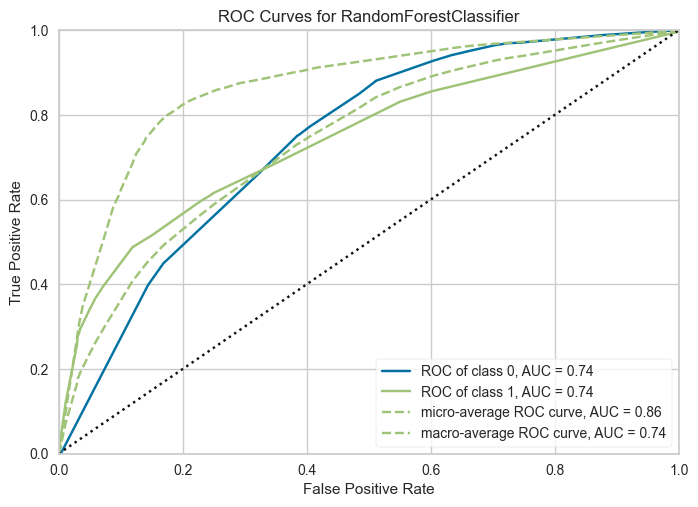

In [24]:
# AUC Plot

plot_model(tuned_rf, plot="auc")

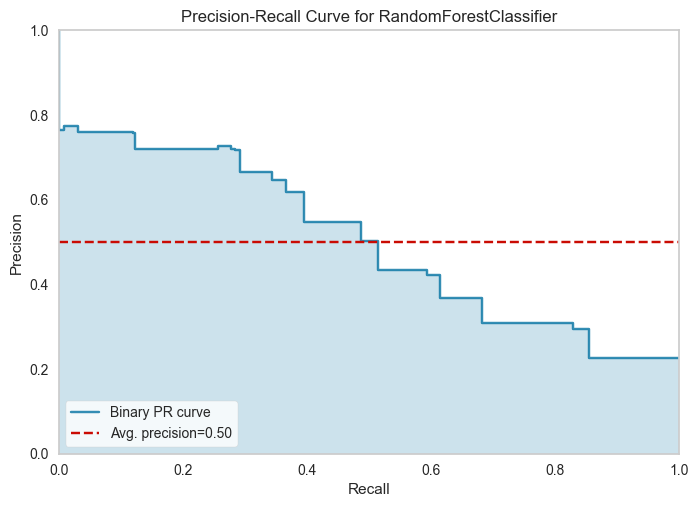

In [25]:
# Precision-recall curve 適合率-再現率曲線

plot_model(tuned_rf, plot="pr")

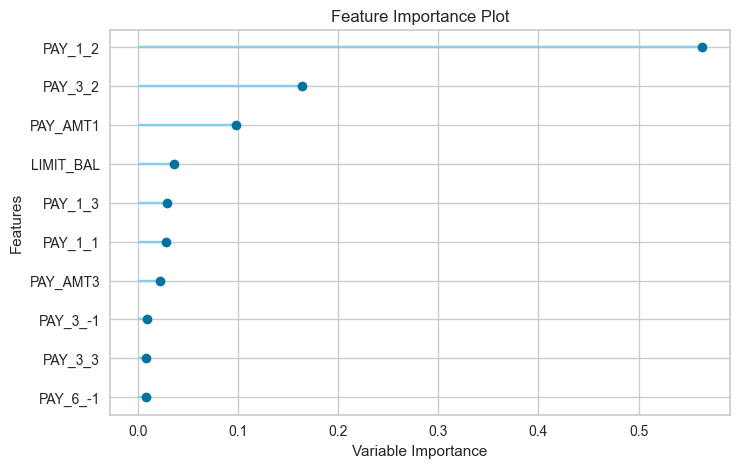

In [26]:
# feature importance 特徴量重要度

plot_model(tuned_rf, plot="feature")

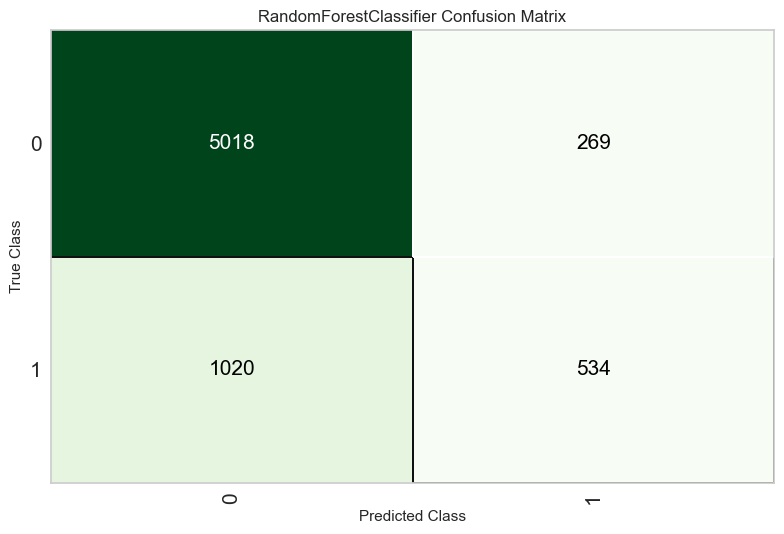

In [27]:
# confusion matrix 混同行列

plot_model(tuned_rf, plot="confusion_matrix")

## 7- Evaluation the model（モデルの評価）

![Evaluation the model](./07_ml-pipeline.png)

モデルの性能を解析するもう一つの方法は、与えられたモデルに対して利用可能なすべてのグラフィックスのユーザーインターフェースを表示する `evaluate_model()` 関数を使用することです。内部的には `plot_model()` 関数を使用しています。

In [28]:
# evaluate_model(tuned_rf)

## 8- Finalizing the Model（モデルの最終決定）

![Finalizing the Model](./08_ml-pipeline.png)

The completion of the model is the last step of the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparison of all models using `compare_models()` and pre-selection of some candidate models (based on the metric of interest) to perform various modeling techniques, such as hyperparameter fitting, assembly, stacking, etc.

This workflow will eventually lead you to the best model to use for making predictions on new and unseen data. The `finalize_model()` function fits the model to the complete data set, including the test sample (30% in this case). The purpose of this function is to train the model on the complete data set before it is deployed into production. We can execute this method after or before the `predict_model()`. We're going to execute it after of it.

One last word of caution. Once the model is finalized using `finalize_model()`, the entire data set, including the test set, is used for training. Therefore, if the model is used to make predictions about the test set after `finalize_model()` is used, the printed information grid will be misleading since it is trying to make predictions about the same data that was used for the modeling.

To demonstrate this point, we will use `final_rf` in `predict_model()` to compare the information grid with the previous.

モデルの完成が実験の最後のステップとなります。PyCaret の通常の機械学習ワークフローは `setup()` から始まり、次に `compare_models()` を用いて全てのモデルを比較し、ハイパーパラメータフィット、アセンブル、スタッキングなどの様々なモデリング技術を行うために（関心のあるメトリクスに基づいて）いくつかの候補モデルを予め選択します。

このワークフローは最終的に、新しいデータや 未知のデータに対して予測を行うために使用する最適なモデルを導き出すことになります。`finalize_model()` 関数は、テストサンプル（この例では30%）を含む完全なデータセットにモデルを当てはめます。この関数の目的は、実運用に投入する前に、完全なデータセットでモデルを学習させることです。このメソッドは `predict_model()` の後にも前にも実行することができます。ここでは、`predict_model()'の後に実行することにします。

最後に注意点を一つ。`finalize_model()` を用いてモデルを確定すると、テストセットを含む全てのデータセットが学習に使用されます。したがって、`finalize_model()` を使用した後に、テストセットに関する予測を行うためにモデルを使用すると、モデリングに使用したのと同じデータに関する予測を行おうとしているため、出力された情報グリッドは誤解を招くことになります。

この点を実証するために、`predict_model()`の `final_rf` を使って、情報グリッドを前回と比較することにします。

In [29]:
final_rf = finalize_model(tuned_rf)

In [30]:
# Final Random Forest model parameters for deployment
# 最終的なRandom Forestモデルのパラメータを展開

print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


## 9- Predicting with the model（モデルによる予測）

![Predicting with the model](./09_ml-pipeline.png)

Before finalizing the model, it is advisable to perform a final check by predicting the **test/hold-out set (`data_unseen` in our case)** and reviewing the evaluation metrics. If you look at the information table, you will see that 30% (6,841 samples) of the data have been separated as training/set samples.

All of the evaluation metrics we have seen above are cross-validated results based on the training set (70%) only. Now, using our final training model stored in the `tuned_rf` variable we predict against the test sample and evaluate the metrics to see if they are materially different from the CV results.

モデルを確定する前に、**テスト/ホールドアウトセット（我々の場合は `data_unseen` ）**を予測し、評価指標を確認することで最終チェックを行うことをお勧めします。情報テーブルを見ると、データの30%(6,841サンプル)が学習/セットサンプルとして分離されていることがわかります。

上記で見た評価メトリックは全て、学習セット（70%）のみに基づいて交差検証された結果です。ここで、`tuned_rf`変数に格納された最終的なトレーニングモデルを用いて、テストサンプルに対して予測し、CV結果と大きく異なるかどうか、メトリクスを評価します。

In [31]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9121
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9121
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5013
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8603
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051
6839,200000.0,33.0,50612.0,10537.0,5552.0,2506.0,9443.0,11818.0,10023.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8051


The accuracy of the test set is `0.8199` compared to the `0.8203` achieved in the results of the `tuned_rf`. This is not a significant difference. If there is a large variation between the results of the test set and the training set, this would normally indicate an over-fitting, but it could also be due to several other factors and would require further investigation.

In this case, we will proceed with the completion of the model and the prediction on unseen data (the 5% that we had separated at the beginning and that was never exposed to PyCaret).

(TIP: It is always good to look at the standard deviation of the results of the training set when using `create_model()`.

The `predict_model()` function is also used to predict about the unseen data set. The only difference is that this time we will pass the parameter `data_unseen`. `data_unseen` is the variable created at the beginning of the tutorial and contains 5% (1200 samples) of the original data set that was never exposed to PyCaret.

テストセットの精度は `0.8199` で、`tuned_rf` の結果で達成した `0.8203` と比較しています。これは大きな差ではありません。テストセットとトレーニングセットの結果に大きなばらつきがある場合、通常はオーバーフィッティングを示しますが、他のいくつかの要因による可能性もあり、さらなる調査が必要でしょう。

今回は、未見のデータ（最初に切り離した、PyCaretに触れていない5%のデータ）に対して、モデルの完成と予測を進めていきます。

TIP: `create_model()` を使用する際には、常に学習セットの結果の標準偏差を見るようにするとよいでしょう。

`predict_model()` 関数もまた、未知のデータセットについて予測するために使用されます。唯一の違いは、今回は `data_unseen` というパラメータを渡すことです。data_unseen` はチュートリアルの最初に作成した変数で、PyCaret に公開されていない元のデータセットの 5% (1200 サンプル) が格納されています。

In [32]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,1,2,2,2,0,...,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,0,0.6193
1196,220000,1,2,1,41,0,0,-1,-1,-2,...,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9121
1197,420000,1,1,2,34,0,0,0,0,0,...,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.9121
1198,90000,1,2,1,36,0,0,0,0,0,...,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.8051


### Please go to the last column of this previous result, and you will see a new feature called `Score`

この前回の結果の最後の欄から、「スコア」という新しい機能をご覧ください。

![Score](./score.png)

Label is the prediction and score is the probability of the prediction. Note that the predicted results are concatenated with the original data set, while all transformations are automatically performed in the background.

We have finished the experiment finalizing the `tuned_rf` model that now is stored in the `final_rf` variable. We have also used the model stored in `final_rf` to predict `data_unseen`. This brings us to the end of our experiment, but one question remains: What happens when you have more new data to predict? Do you have to go through the whole experiment again? The answer is no, PyCaret's built-in `save_model()` function allows you to save the model along with all the transformation pipe for later use and is stored in a Pickle in the local environment

(TIP: It's always good to use the date in the file name when saving models, it's good for version control)

Let's see it in the next step

ラベルは予測値、スコアは予測値の確率です。なお、予測結果は元のデータセットと連結されるが、すべての変換はバックグラウンドで自動的に行われます。

実験は終了し、最終的に `tuned_rf` モデルが `final_rf` 変数に格納されました。また、`final_rf`に格納されたモデルを用いて、`data_unseen`を予測しました。これで実験は終わりですが、一つ疑問が残ります。予測する新しいデータが増えたらどうなるのでしょうか？この実験をもう一度やり直さなければならないのでしょうか？PyCaret の組み込み関数 `save_model()` を使えば、モデルをすべての変換パイプと一緒に保存し、後で使用することができ、ローカル環境の Pickle に保存されます。

(ヒント: モデルを保存するとき、ファイル名に日付を使用するのは常に良いことで、バージョン管理のために良いことです)

次のステップで見てみましょう

## 10- Save/Load Model for Production（本番用モデルの保存/読み込み）

![Save/Load Model for Production](./10_ml-pipeline.png)

### Save Model

In [33]:
save_model(final_rf, "final_rf_14Nov2022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

### Load Model

後日保存したモデルを同じ環境または別の環境で読み込むには、PyCaret の `load_model()` 関数を使用し、保存したモデルを新しい未見のデータに適用して簡単に予測することになります。

In [36]:
saved_final_rf = load_model("final_rf_14Nov2022")

Transformation Pipeline and Model Successfully Loaded


一旦モデルが環境にロードされると、同じ `predict_model()` 関数を使用して新しいデータを予測するために使用することができます。次に、ロードされたモデルを適用して、以前使用したのと同じ `data_unseen` を予測します。

In [37]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8167,0.7768,0.3612,0.6463,0.4634,0.3634,0.3857


In [38]:
new_prediction

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8051
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9121
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8051
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7911
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,1,2,2,2,0,...,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,0,0.6193
1196,220000,1,2,1,41,0,0,-1,-1,-2,...,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9121
1197,420000,1,1,2,34,0,0,0,0,0,...,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.9121
1198,90000,1,2,1,36,0,0,0,0,0,...,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.8051


In [40]:
from pycaret.utils import check_metric
check_metric(new_prediction.default, new_prediction.Label, "Accuracy")

0.8167

## Pros & Cons

どんな新しいライブラリでもそうですが、まだ改善の余地があります。ここでは、実際に使ってみて感じた長所と短所を列挙します。

### Pros:

- モデリング部分をより簡単にすることができます。
- たった1行のコードで、さまざまな分析結果を作成することができます。
- モデルフィッティングの際にパラメータリストを渡すのは忘れてください。PyCaret が自動的にやってくれます。
- モデルを評価するためのさまざまなオプションがあり、ここでもたった1行のコードで評価できます。
- 有名なMLライブラリの上に構築されているため、従来の手法と容易に比較することができます。

### Cons:

- ライブラリは初期のバージョンであるため、十分に成熟しておらず、バグの影響を受けやすくなっています。 正直言って大したことじゃない。
- ほかのAuto MLライブラリと同様、ブラックボックスなので、内部で何が起きているのかがよくわかりません。したがって、初心者の方にはお勧めできません。
- ちょっと表面的な学習になってしまうかもしれません。

## Conclusions（結論）

このチュートリアルでは、データの取り込みから、前処理、モデルの学習、ハイパーパラメータのフィット、予測、後で使用するためのモデルの保存まで、MLの全工程をカバーしました。これらの全てのステップを、`create_model()`, `tune_model()`, `compare_models()` などの、自然に構築され非常に直感的に覚えられる10以下のコマンドで完了させました。PyCaret なしでこの実験全体を再現するには、ほとんどのライブラリで 100 行以上のコードが必要だったでしょう。

また、このライブラリでは、高度な前処理、アセンブリ、一般化スタッキングなど、より高度なことができるようになっており、MLパイプラインを完全にカスタマイズすることができ、データサイエンティストにとって必須の技術となっています。